# Разложение Холецкого

## Пример с положительно определенной матрицей. A = LL<sup>T</sup>.

### Задаю матрицу.

In [1]:
import numpy as np
a = np.array([
    [81, -45, 45],
    [-45, 50, -15],
    [45, -15, 38]
])

### Нахожу собственные значения матрицы и проверяю на положительную определенность.

In [2]:
is_positive_definite_matrix = np.all(np.linalg.eigvals(a) > 0)
print(is_positive_definite_matrix)

True


### Задаю функцию для нахождения L или S.

In [3]:
def find_l_or_s(a, is_positive_definite_matrix):
    if is_positive_definite_matrix == True:
        l = np.zeros_like(a)
        for i in range(a.shape[0]):
            for j in range(i+1):
                sum = 0
                if i == j:
                    for k in range(i):
                        sum += l[i][k] * l[i][k]
                    l[i][i] = np.sqrt(a[i][i] - sum)
                else:
                    for k in range(j):
                        sum += l[i][k] * l[j][k]
                    l[i][j] = 1 / l[j][j] * (a[i][j] - sum)
        return(l)
    else:
        d = np.zeros_like(a)
        s = np.zeros_like(a)
        for i in range(a.shape[0]):
            for j in range(i, a.shape[0]):
                if i == j:
                    sum = 0
                    for p in range(i):
                        sum += s[p][i]**2 * d[p][p]
                    d[i][j] = np.sign(a[i][j] - sum)
                    s[i][j] = np.sqrt(np.abs(a[i][j] - sum))
                else:
                    sum = 0
                    for p in range(i):
                        sum += s[p][i] * d[p][p] * s[p][j]
                    s[i][j] = (a[i][j] - sum) / (d[i][i] * s[i][i])
        return(s, d)

### Нахожу матрицу L и сравниваю ее с матрицей L, полученной с помощью метода библиотеки numpy.

In [4]:
l = find_l_or_s(a, is_positive_definite_matrix)
print(l)

[[ 9  0  0]
 [-5  5  0]
 [ 5  2  3]]


In [5]:
np_l = np.linalg.cholesky(a)
print(np_l)

[[ 9.  0.  0.]
 [-5.  5.  0.]
 [ 5.  2.  3.]]


### Проверяю A = LL<sup>T</sup>.

In [6]:
lt = l.transpose()
llt = np.dot(l, lt)
print('Матрица LL^T:')
print(llt)
print()
print('Исходная матрица A:')
print(a)

Матрица LL^T:
[[ 81 -45  45]
 [-45  50 -15]
 [ 45 -15  38]]

Исходная матрица A:
[[ 81 -45  45]
 [-45  50 -15]
 [ 45 -15  38]]


### Создаю вектор B.

In [7]:
b = np.array([531, -460, 193])

### Создаю функцию для решения системы уравнений.

In [8]:
def find_xy(a, b, is_positive_definite_matrix, d=None):
    y = np.zeros(a.shape[0])
    x = np.zeros(a.shape[0])
    if is_positive_definite_matrix == True:
        for i in range(y.shape[0]):
            sum = 0
            for k in range(i):
                sum+= a[i][k] * y[k]
            y[i] = (b[i] - sum) / a[i][i]
        for i in range(x.shape[0]-1, -1, -1):
            sum = 0
            for k in range(i+1, x.shape[0]):
                sum+= a[k][i] * x[k]
            x[i] = (y[i] - sum) / a[i][i]
    else:
        for i in range(y.shape[0]):
            sum = 0
            for k in range(i):
                sum+= a.transpose()[i][k] * y[k] * d[k][k]
            y[i] = (b[i] - sum) / a.transpose()[i][i] * d[i][i]
        for i in range(x.shape[0]-1, -1, -1):
            sum = 0
            for k in range(i+1, x.shape[0]):
                sum+= a[i][k] * x[k]
            x[i] = (y[i] - sum) / a[i][i]
    return(x, y)

### Решаю систему уравнений Ax = b.

In [9]:
x, y = find_xy(l, b, is_positive_definite_matrix)
print('y:', y)
print('x:', x)

y: [ 59. -33. -12.]
x: [ 6. -5. -4.]


### Проверил решение уравнения с готовым методом.

In [10]:
np_x =np.linalg.solve(a,b)
print('x:', np_x)

x: [ 6. -5. -4.]


### Проверил решение уравнений.

In [11]:
print('b:', b)
bb = np.zeros_like(b)
for i in range(a.shape[0]):
    sum = 0
    for j in range(a.shape[0]):
        sum += a[i][j] * x[j]
    bb[i] = sum
print('bb:', bb)

b: [ 531 -460  193]
bb: [ 531 -460  193]


### Пример с матрицей, которая не обязательно положительно определена. A = S<sup>T</sup>DS.

In [12]:
a_n = np.array([
    [3.14, -2.12, 1.17],
    [-2.12, 1.32, -2.45],
    [1.17, -2.45, 1.18]
])

### Нахожу собственные значения матрицы и проверяю на положительную определенность.

In [13]:
is_positive_definite_matrix_an = np.all(np.linalg.eigvals(a_n) > 0)
print(is_positive_definite_matrix_an)

False


### Нахожу матрицу S и матрицу D.

In [14]:
s, d = find_l_or_s(a_n, is_positive_definite_matrix_an)
print('S:')
print(s)
print('D:')
print(d)

S:
[[ 1.77200451 -1.19638521  0.6602692 ]
 [ 0.          0.33367286  4.97512347]
 [ 0.          0.          5.04934631]]
D:
[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]


### Проверяю, что A=S<sup>T</sup>DS.

In [15]:
print('A:')
print(a_n)
print('S^TDS:')
a_nn = s.transpose() @ d @ s
print(a_nn)

A:
[[ 3.14 -2.12  1.17]
 [-2.12  1.32 -2.45]
 [ 1.17 -2.45  1.18]]
S^TDS:
[[ 3.14 -2.12  1.17]
 [-2.12  1.32 -2.45]
 [ 1.17 -2.45  1.18]]


### Задаю вектор B

In [16]:
b_n = np.array([1.27, 2.13, 3.14])

### Решаю систему уравнений

In [17]:
x_n, y_n = find_xy(s, b_n, is_positive_definite_matrix_an, d)
print('y:',y_n)
print('x:',x_n)

y: [ 0.71670246 -8.95323701 -8.29348467]
x: [-0.56516068 -2.34260099 -1.6424868 ]


### Проверяю решение уравнений

In [18]:
np_x_n = np.linalg.solve(a_n,b_n)
print('x:', np_x_n)

x: [-0.56516068 -2.34260099 -1.6424868 ]


In [19]:
print('b:', b_n)
bb_n = np.zeros_like(b_n)
for i in range(a_n.shape[0]):
    sum = 0
    for j in range(a_n.shape[0]):
        sum += a_n[i][j] * x_n[j]
    bb_n[i] = sum
print('bb:', bb_n)

b: [1.27 2.13 3.14]
bb: [1.27 2.13 3.14]


# Использование разложение Халецкого для сегментации изображений.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.linalg import cholesky
from sklearn.mixture import GaussianMixture

# Загрузка изображения
image = cv2.imread('bird.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_image = cv2.GaussianBlur(gray_image,(5,5), 0)

In [23]:
#определение функции сегментации
def segment_image(image,n=3):
    # Сжатие изображения до одномерного массива
    flattened_image = image.flatten().reshape(-1,1)
    # Инициализация Модели Гауссовской Микстуры (GMM)
    gmm = GaussianMixture(n_components=n, covariance_type='full',random_state=43)
    # Обучение модели
    gmm.fit(flattened_image)
    # Нахождение матрицы средних и матрицы ковариации
    means = gmm.means_
    covariances = gmm.covariances_
    
    # Использование разложения Холецкого для нахождения обратной ковариационной матрицы
    inv_covariances = np.zeros_like(covariances)
    for i in range(len(covariances)):
        inv_covariances[i] = np.linalg.inv(cholesky(covariances[i], lower = True))
    
    # Вычислеиня функции Правдоподобия для каждого пиксела сигментации
    likelihooods = np.zeros((len(flattened_image), len(means)))
    for i in range(len(means)):
        diff = flattened_image - means[i]
        exponent = np.sum(np.square(np.dot(diff, inv_covariances[i].T)), axis = 1)
        likelihooods[:, i] = np.exp(-0.5 * exponent) / np.sqrt(np.linalg \
                                                           .det(covariances[i]))
    
    # присваивание каждого пиксела компоненту с наивысшим правдоподобием
    segmentation = np.argmax(likelihooods, axis = 1).reshape(image.shape)
    return segmentation

## Пример сегментации изображения

Text(0.5, 1.0, 'Результат сегментации')

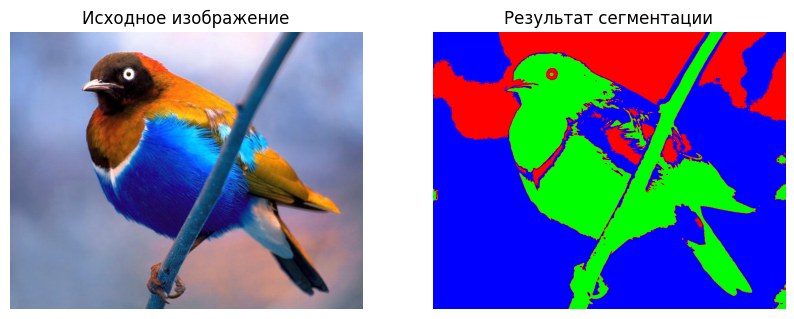

In [25]:
segmentation_result = segment_image(gray_image)

fig = plt.figure(figsize=(10, 7)) 
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1) 
  
plt.imshow(image) 
plt.axis('off') 
plt.title("Исходное изображение") 
  
fig.add_subplot(rows, columns, 2)
  
plt.imshow(segmentation_result,cmap='brg') 
plt.axis('off') 
plt.title("Результат сегментации")